# Introduction to Data Science 2025

# Week 5

## Exercise 1 | Privacy and data protection

First, look up the [European Data Protection Regulation](http://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32016R0679&from=en) (“GDPR”). Note that Articles 1-99 start on p. 32 of the document. We will refer to the articles and their parts by, e.g., “Art 6 (1) a) GDPR” which means Article 6 (“Lawfulness of processing”), first paragraph, item a in the GDPR.

1. Valid Consent?

    Find a service you use to which you have given *consent* for the processing of your personal data (Art 6 (1) a) GDPR). Have a look at the privacy notices, policies, or settings of this service.

    - Are the basic legal conditions for this consent in your opinion in line with the new requirements and conditions set by the GDPR?

    - You should provide an answer with justification based on the GDPR, where you refer to specific articles and paragraphs.

2. Your Right to Access your Personal Data

    You have the right to know if personal data about you is processed by a controller. You also have the right to get access to, for example, the processing purposes, the data categories, data transfers, and duration of storage.

    - Find the relevant parts in GDPR and study your rights as a “data subject”.

    - File a right-to-access request with a data processing service of your choosing. Describe the mechanism that is put in place by the service to enable you to exercise this right (if any).

    - Whether you get a response or not, think about how well your rights as a data subject are respected in practice. Your answer should again refer to specific articles and paragraphs of the GDPR.

3. Anonymisation & Pseudonymisation

    - What is the difference between anonymisation and pseudonymisation of personal data?

**Submit your findings in a PDF file, just a short report is enough.**

## Valid Consent?

I chose linkedIn as the service. [Here is their privacy-policy](https://www.linkedin.com/legal/privacy-policy#choices)

The article states:
* the data subject has given consent to the processing of his or her personal data for one or more specific purposes

It seems to me that having given consent to linkedIn, their data collection policy is in line with GDPR. LinkedIn retains personal data and data inferred by usage.

## My Right to Access my personal data

GDPR states:
* Where personal data relating to a data subject are collected from the data subject, the controller shall, at the time 
when personal data are obtained, provide the data subject with all of the following information
  * the recipients or categories of recipients of the personal data, if any
  * Controller intention of transfering data

### Right-to-access request

LinkedIn settings had a button for a request with 24 hour wait period. LinkedIn will send an email when the data is available.

In prcatice, LinkedIn seems to follow GDPR very well. Art 15 (1) GDPR states I have a right to my personal data, which LinkedIn provides.

LinkedIn also explained the purpose Art 15 (1) a) GDPR for collecting my data.

LinkedIn also explains what kind of data is collected and how. From LI:
* We generally retain your personal data as long as you keep your account open or as needed to provide you Services.  Art 15 (1) a)
* This includes data you or others provided to us and data generated or inferred from your use of our Services. Art 15 (1) e)

LinkedIn also states the right-to-access
* You can ask us for a copy of your personal data and can ask for a copy of personal data you provided in machine readable form.  Art 15 (1) e)

## Anynymization and Pseudonymization

Major difference is that anonymization aims to prevent re-identification. In pseudonymization, identifiers are replaced with artificial identifiers. Pseudonymization is a way to comply with GDPR
demand for secure data collection.

So pseudonymization makes data less identifiable while allowing the data be used for processing and analysis.

Sources:
* https://en.wikipedia.org/wiki/Pseudonymization
* https://en.wikipedia.org/wiki/Data_anonymization


## Exercise 2 | Fairness-aware AI

This template generates data about the working hours and salaries of n=5000 people. The salary equals 100 x working hours plus/minus normal distributed noise. If you run the template, it produces an _hours_ vs _monthly salary_ scatter plot with gender=0 (men) in orange and gender=1 (women) in orange. The plot includes a trend line for each group, and an overall trend line for all data combined (in red). 

A linear regression model (see the next code cell) that only includes the working hours as a covariate *without* the protected characteristic (gender) should have slope close to 100.0.

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Simulating the data

In [14]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n) 

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

### Scatterplot of the simulated data
Women samples (gender = 1) are shown with blue, men samples (gender = 0) are shown in orange.
Blue and orange lines are the trend lines of each group accordingly.
The overall trend line is shown in red.

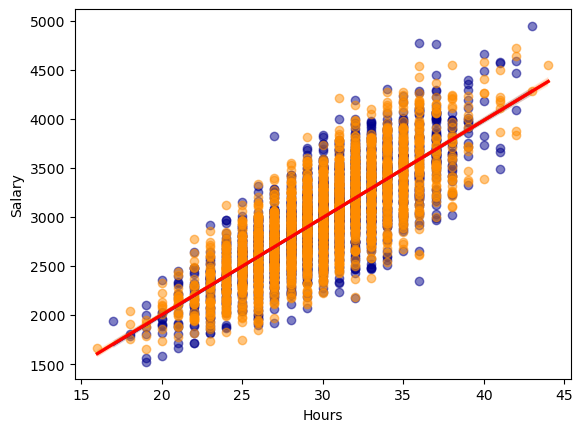

In [15]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

### Linear regression
Learn the overall regression model, which is what an algorithm with no access to the gender ("protected characteristic") would learn from the data.

In [16]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_[0][0])

slope: 99.0


### Task

Now edit the code to simulate each of the following scenarios:

a) the salary of women is reduced by 200 euros ("direct discrimination")

b) the working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45), no changes in per-hour salary ("no discrimination")

c) both of the above changes at the same time ("indirect discrimination")

You should be able to demonstrate that the slope of the linear regression model is only changed in one of these scenarios.

Based on this experiment, answer the following questions:
1. In which of the scenarios the slope (coefficient) of the regression model changes?
2. How could you model the data in a way that enables you to detect indirect discrimination? _Hint_: Should you include the protected characteristic in the model or not?

To answer the second question, demonstrate your solution by building a regression model and interpreting the estimated coefficients.

**Submit this exercise by submitting your code and your answers to the above questions on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

def a():
    n = 5000
    gen = np.random.binomial(1, 0.5, size=n)
    hrs = np.random.binomial(60, 0.5, size=n)
    sal = hrs * np.random.normal(100, 10, size=n) 
    data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})
    data.loc[data["Gender"]==1, "Salary"] -= 200
    return data

def b(diff = 0.05):
    n = 5000
    gen_1 = np.sum(np.random.binomial(1, 0.5, size=n))
    gen_0 = n - gen_1
    ids = np.arange(n)
    np.random.shuffle(ids)
    hrs = np.concat([np.random.binomial(60, 0.5 - diff, size=gen_0), np.random.binomial(60, 0.50 + diff, size=gen_1)])
    gen = np.concat([np.ones(gen_1), np.zeros(gen_0)])
    
    sal = hrs * np.random.normal(100, 10, size=n) 
    data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})
    return data

def c():
    data = b()
    data.loc[data["Gender"]==1, "Salary"] -= 200
    return data

def get_coeff(data):
    return LinearRegression().fit(data['Hours'].to_numpy().reshape(-1,1), data['Salary'].to_numpy().reshape(-1,1))

def plot_and_regression(data):
    reg = get_coeff(data)
    print("slope: %.1f" % reg.coef_[0][0])
    sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})
    sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})
    sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")
    plt.show()

slope: 100.4


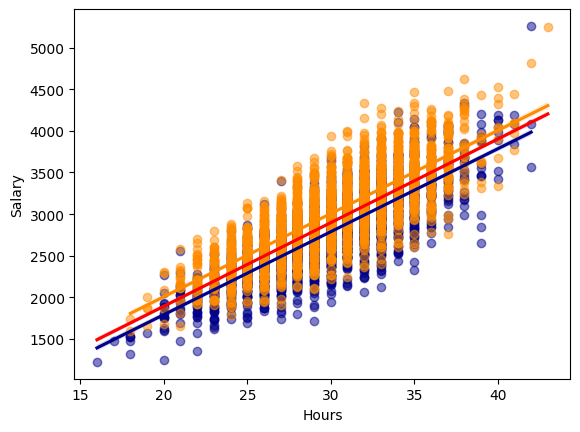

In [11]:
plot_and_regression(a())

slope: 100.3


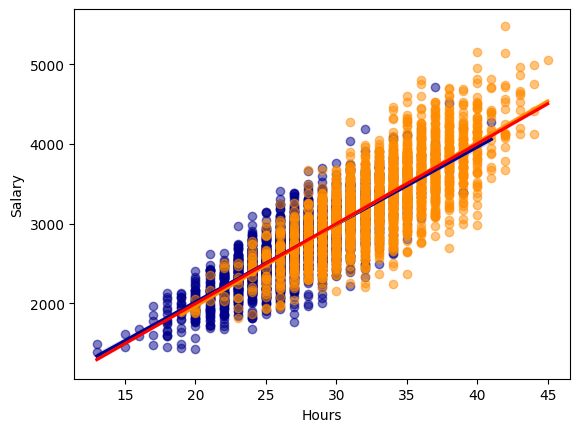

In [12]:
plot_and_regression(b())

slope: 113.1


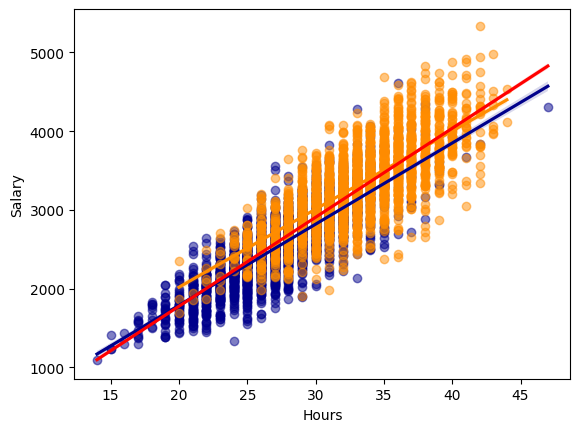

In [13]:
plot_and_regression(c())

 ## In which of the scenarios the slope (coefficient) of the regression model changes?

 The slope changes only in scenario C. 
 
 A slope remains unchanged, because lowering half of the points by a static amount doesn't affect the angle of the slope. This is the case only when the average is the same for both genders, before the reduction.

 B slope remains unchanged, because increasing male working hours shifts male salary points in the direction of the slope. The effect could be even stronger, without affecting the slope:

slope: 100.7


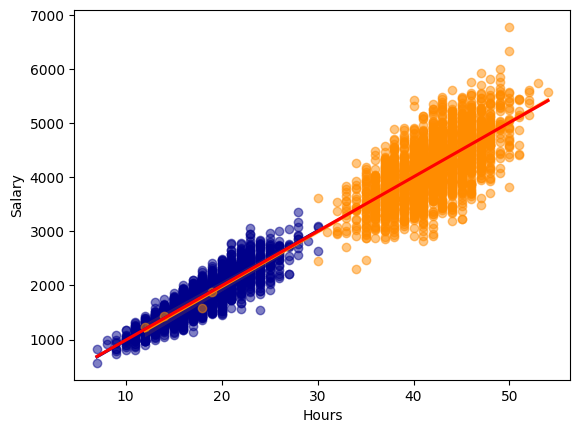

In [15]:
plot_and_regression(b(diff = 0.2))

C slope changes because shifting working hours first changes the average gender point (the middle of the blue and orange points). When the salary is decreased now, the slope also changes.

In [15]:
def detect_indirect_discrimination(data):
    both = get_coeff(data)
    gen_1 = get_coeff(data[data["Gender"] == 1])
    gen_0 = get_coeff(data[data["Gender"] == 0])
    print(f"Gen both slope: {both.coef_[0][0]:.2f}, intercept: {both.intercept_[0]}")
    print(f"Gen 1 slope: {gen_1.coef_[0][0]:.2f}, intercept: {gen_1.intercept_[0]}")
    print(f"Gen 0 slope: {gen_0.coef_[0][0]:.2f}, intercept: {gen_0.intercept_[0]}")
    print()


detect_indirect_discrimination(a())
detect_indirect_discrimination(b())
detect_indirect_discrimination(c())

Gen both slope: 100.47, intercept: -118.26632764093301
Gen 1 slope: 100.94, intercept: -237.91743916072164
Gen 0 slope: 99.94, intercept: 1.1414251001292541

Gen both slope: 101.78, intercept: -54.06154231637083
Gen 1 slope: 101.60, intercept: -47.95431809892989
Gen 0 slope: 102.44, intercept: -77.07183710955405

Gen both slope: 111.30, intercept: -444.7806763095623
Gen 1 slope: 98.28, intercept: -154.31017242292273
Gen 0 slope: 100.36, intercept: -9.15037159012536



If slope is different for all data, compared to either genders, there is indirect discrimination